##### Import Required Library

In [1]:
# Importing the required library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Read data from excel file

In [2]:
# read excel using read_excel function of pandas
courses=pd.read_excel('Course Dataset.xlsx',sheet_name=1)
rating=pd.read_excel('Course Dataset.xlsx',sheet_name=2)

## Basic data checks
Check size/shape of data.<br>
Look at few records.<br>
Check for duplicates.<br>
Check Unique values in string based columns.<br>
Check for null entries.<br>

In [3]:
courses.shape

(891, 7)

In [4]:
rating.shape

(5, 3)

In [5]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,1,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,2,A Crash Course in Causality: Inferring Causal ...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,3,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,4,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,5,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [6]:
#Check if duplicates are avaialble in data
courses.duplicated().sum()

0

In [7]:
rating

,Min Rating,Max Rating,Feedback Categegory
0,4.8,5.00,Excellent
1,4.5,4.79,Good
2,4.0,4.49,Average
3,3.5,3.99,Below Average
4,3.0,3.49,Not Good


In [8]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No                      891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   888 non-null    object 
 4   course_rating             881 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


##### Check if data need to convert in upper
course_Certificate_type needs to be converted to upper as it has both upper and lower entries.
But its always better to convert all into upper or lower case 

In [9]:
# check values in str columns if it has entries in both lower and upper case.By using nunique function.
for col in courses.columns:
    if courses[col].dtype == 'object':
        print(col, courses[col].nunique(),courses[col].str.upper().nunique())

course_title 888 888
course_organization 154 154
course_Certificate_type 11 9
course_difficulty 4 4
course_students_enrolled 205 205


In [120]:
# course_Certificate_type has entries in both case and also need some spelling correction.
courses['course_Certificate_type'].value_counts()

COURSE                     582
SPECIALIZATION             297
PROFESSIOAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [121]:
# Convert data into upper case
for col in courses.columns:
    if courses[col].dtype == 'object':
        courses[col]=courses[col].str.upper()

In [122]:
courses['course_Certificate_type'].value_counts()

COURSE                     582
SPECIALIZATION             297
PROFESSIOAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

### correct spelling in course_Certificate_type column 
COU RSE to COURSE <br>
SPECIALIZATOIN and SPCEIALIZATION to  SPECIALIZATION to SPECIALIZATION <br>
PROFESSION CERTIFICATE, PROFESSIOAL CERTIFICATE and PROFESSIONAL  CERTIFICATE  to PROFESSIONAL CERTIFICATE

In [13]:
courses['course_Certificate_type'] = courses['course_Certificate_type'].str.replace('COU RSE',"COURSE")

In [14]:
courses['course_Certificate_type'] =courses['course_Certificate_type'].apply(lambda X :'SPECIALIZATION' if str(X).startswith('SP') else X)

In [15]:
courses['course_Certificate_type'] = courses['course_Certificate_type'].apply(lambda X :'PROFESSIOAL CERTIFICATE' if str(X).startswith('PROFESSION') else X)

In [16]:
courses['course_Certificate_type'].value_counts()

COURSE                     579
SPECIALIZATION             297
PROFESSIOAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [17]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,1,(ISC)² SYSTEMS SECURITY CERTIFIED PRACTITIONER...,(ISC)²,SPECIALIZATION,4.7,BEGINNER,5.3K
1,2,A CRASH COURSE IN CAUSALITY: INFERRING CAUSAL ...,UNIVERSITY OF PENNSYLVANIA,COURSE,4.7,INTERMEDIATE,17K
2,3,A CRASH COURSE IN DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,COURSE,4.5,MIXED,130K
3,4,A LAW STUDENT'S TOOLKIT,YALE UNIVERSITY,COURSE,4.7,MIXED,91K
4,5,A LIFE OF HAPPINESS AND FULFILLMENT,INDIAN SCHOOL OF BUSINESS,COURSE,4.8,MIXED,320K


##### NUll Entries in data:
course_Certificate_type has 3 null records
course_rating has 10 null record

In [18]:
for col in courses.columns:
    print(col,courses[col].isna().sum())

S.No 0
course_title 0
course_organization 0
course_Certificate_type 3
course_rating 10
course_difficulty 0
course_students_enrolled 0


#### Handling Null Values

Observed that there are ratings which are more than 5, so we willmake those as null and then fill with mean value.<br>
First we will check the mean of rating is varying based on Organization/course_difficulty.<br>
But observed that mean is not varying so fill the nan value with man of overall level rating. 


In [123]:
#check distinct values
courses['course_rating'].value_counts()

4.7    263
4.8    251
4.6    163
4.5     79
4.9     67
4.4     34
4.3     15
4.2     10
5.0      2
4.0      2
3.9      2
3.3      1
4.1      1
3.7      1
Name: course_rating, dtype: int64

In [124]:
# records with more than 5 rating
courses[courses['course_rating']>5]

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category


In [21]:
# convert ratings more than 5 to nan value
courses['course_rating'] = courses['course_rating'].apply(lambda X : np.nan if X>5 else X)

In [22]:
# total records with nan as rating
courses[courses['course_rating'].isna()]

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
10,11,AI FOR MEDICAL PROGNOSIS,DEEPLEARNING.AI,COURSE,NaN,INTERMEDIATE,4K
14,15,AWS FUNDAMENTALS: BUILDING SERVERLESS APPLICAT...,AMAZON WEB SERVICES,COURSE,NaN,BEGINNER,27K
21,22,ACCOUNTING ANALYTICS,UNIVERSITY OF PENNSYLVANIA,COURSE,NaN,MIXED,80K
53,54,ANTIMICROBIAL RESISTANCE - THEORY AND METHODS,TECHNICAL UNIVERSITY OF DENMARK (DTU),COURSE,NaN,INTERMEDIATE,63K
92,93,BIOSTATISTICS IN PUBLIC HEALTH,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,NaN,BEGINNER,14K
106,107,BUILDING RESILIENT STREAMING ANALYTICS SYSTEMS...,GOOGLE CLOUD,COURSE,NaN,INTERMEDIATE,5.8K
120,121,BUSINESS WRITING,UNIVERSITY OF COLORADO BOULDER,COURSE,NaN,BEGINNER,48K
221,222,DEVELOPING APPLICATIONS WITH GOOGLE CLOUD PLAT...,GOOGLE CLOUD,SPECIALIZATION,NaN,INTERMEDIATE,300K
259,260,ENGLISH COMPOSITION I,DUKE UNIVERSITY,COURSE,NaN,BEGINNER,200K
326,327,FOUNDATIONAL FINANCE FOR STRATEGIC DECISION MA...,UNIVERSITY OF MICHIGAN,SPECIALIZATION,NaN,BEGINNER,14K


In [125]:
# null rating records
null_ratings = courses[courses['course_rating'].isna()].loc[:,['course_organization','course_difficulty']]

In [126]:
null_ratings

,course_organization,course_difficulty


In [24]:
# function to get avg rating by course_difficulty and course_organization
list_avgrateby_org_diff = []
def fun(x,y):
    pivotbyorganddiff =courses.groupby(['course_difficulty','course_organization']).agg({'course_rating':'mean'})
    pivotbyorganddiff.reset_index(inplace=True)
    d=pivotbyorganddiff[(pivotbyorganddiff['course_organization']==x) & (pivotbyorganddiff['course_difficulty']==y)]
    list_avgrateby_org_diff.append({'course_organization':x,'course_difficulty':y,'rate':d['course_rating'].values[0]})

In [25]:
null_ratings=null_ratings.apply(lambda X : fun(X['course_organization'],X['course_difficulty']),axis=1)

In [26]:
# check avg rate by organisation and difficulty
df = pd.DataFrame.from_dict(list_avgrateby_org_diff)
print(df)

                      course_organization course_difficulty      rate
0                         DEEPLEARNING.AI      INTERMEDIATE  4.733333
1                     AMAZON WEB SERVICES          BEGINNER  4.533333
2              UNIVERSITY OF PENNSYLVANIA             MIXED  4.712000
3   TECHNICAL UNIVERSITY OF DENMARK (DTU)      INTERMEDIATE  4.600000
4                JOHNS HOPKINS UNIVERSITY          BEGINNER  4.662500
5                            GOOGLE CLOUD      INTERMEDIATE  4.576190
6          UNIVERSITY OF COLORADO BOULDER          BEGINNER  4.750000
7                            GOOGLE CLOUD      INTERMEDIATE  4.576190
8                         DUKE UNIVERSITY          BEGINNER  4.666667
9                  UNIVERSITY OF MICHIGAN          BEGINNER  4.741176
10                 UNIVERSITY OF MICHIGAN          BEGINNER  4.741176
11                           GOOGLE CLOUD      INTERMEDIATE  4.576190
12                        DUKE UNIVERSITY             MIXED  4.644444
13                  

In [27]:
# Distribution of rating by course difficulty
courses.groupby(['course_difficulty']).agg({'course_rating':'mean'})

,course_rating
course_difficulty,
ADVANCED,4.600000
BEGINNER,4.679583
INTERMEDIATE,4.647150
MIXED,4.709189


In [28]:
courses['course_rating'].mean()

4.676966932725195

In [29]:
round(courses['course_rating'].mean(),1)

4.7

In [30]:
courses['course_difficulty'].value_counts()

BEGINNER        487
INTERMEDIATE    198
MIXED           187
ADVANCED         19
Name: course_difficulty, dtype: int64

##### Fill the nan value with overall avg raing as the avg rating at other level is close to the overall avg rating.

In [31]:
courses['course_rating'].fillna(round(courses['course_rating'].mean(),1),inplace=True)

<Figure size 1080x288 with 0 Axes>

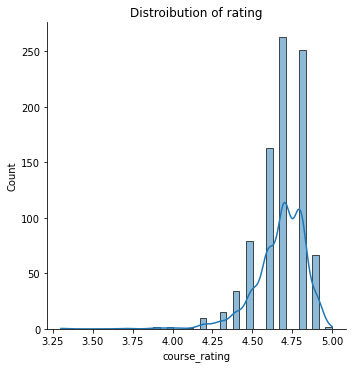

In [32]:
# distribution of ratings
plt.figure(figsize=(15,4))
sns.displot(data=courses, x="course_rating", kde=True).set(title='Distroibution of rating')

Average Rating is quite higher compared to minimum value.

##### course_Certificate_type has 3 null entries we will fill it by mode(most frequent value)

In [33]:
# check null values in course_Certificate_type
courses[courses['course_Certificate_type'].isna()]

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
79,80,BASIC STATISTICS,UNIVERSITY OF AMSTERDAM,NaN,4.6,BEGINNER,180K
105,106,BUILDING CONVERSATIONAL EXPERIENCES WITH DIALO...,GOOGLE CLOUD,NaN,4.5,BEGINNER,22K
127,128,CAMINO A LA EXCELENCIA EN GESTIÓN DE PROYECTOS,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,NaN,4.7,BEGINNER,340K


In [34]:
# get mode i.e. most frequent value
courses['course_Certificate_type'].mode()

0    COURSE
dtype: object

In [35]:
# fill null values with mode
courses['course_Certificate_type'].fillna("COURSE",inplace=True)

In [36]:
# Now there are no missing values
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No                      891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


##### Process course_students_enrolled Column as it contains values in string and both in millions(M) and thousands(K)

In [37]:
courses['course_students_enrolled'].str[-1].unique()

array(['K', 'M'], dtype=object)

In [38]:
# function to convert enrolled students in K's 
def process_course_students_enrolled(X):
    if X[-1] == 'K':
        
        return float(X[:-1])
    if X[-1] == 'M':
        return float(X[:-1])*1000
    else:
        return -1

In [39]:
courses['Enrolled(In K)']=courses['course_students_enrolled'].apply(lambda X : process_course_students_enrolled(X))

In [40]:
courses['Enrolled(In K)'].describe()

count     891.000000
mean       90.552076
std       181.936454
min         1.500000
25%        17.500000
50%        42.000000
75%        99.500000
max      3200.000000
Name: Enrolled(In K), dtype: float64

In [41]:
# check for higher numbers. Here are few values which in millions and those are kind of outliers in data but we will keep it in data for descriptive analysis 
courses.sort_values(by='Enrolled(In K)',ascending=False)['Enrolled(In K)'].head(20)

564    3200.0
815    2500.0
688    1500.0
674    1300.0
196     830.0
129     790.0
261     760.0
765     750.0
199     740.0
211     690.0
626     630.0
426     610.0
18      540.0
113     510.0
296     490.0
420     480.0
691     480.0
56      480.0
313     470.0
678     440.0
Name: Enrolled(In K), dtype: float64

[Text(0.5, 1.0, 'Distribution of Student Enrolled')]

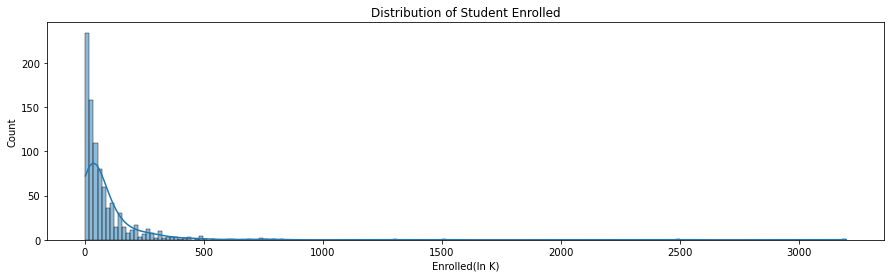

In [42]:
# histplot describe the distribution is right skewed as it has some courses with huge numbers of enroll.
plt.figure(figsize=(15,4))
sns.histplot(data=courses, x="Enrolled(In K)", kde=True).set(title='Distribution of Student Enrolled')

### Cobine Two dataset

In [43]:
courses.head()

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K)
0,1,(ISC)² SYSTEMS SECURITY CERTIFIED PRACTITIONER...,(ISC)²,SPECIALIZATION,4.7,BEGINNER,5.3K,5.3
1,2,A CRASH COURSE IN CAUSALITY: INFERRING CAUSAL ...,UNIVERSITY OF PENNSYLVANIA,COURSE,4.7,INTERMEDIATE,17K,17.0
2,3,A CRASH COURSE IN DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,COURSE,4.5,MIXED,130K,130.0
3,4,A LAW STUDENT'S TOOLKIT,YALE UNIVERSITY,COURSE,4.7,MIXED,91K,91.0
4,5,A LIFE OF HAPPINESS AND FULFILLMENT,INDIAN SCHOOL OF BUSINESS,COURSE,4.8,MIXED,320K,320.0


In [44]:
rating.head()

,Min Rating,Max Rating,Feedback Categegory
0,4.8,5.00,Excellent
1,4.5,4.79,Good
2,4.0,4.49,Average
3,3.5,3.99,Below Average
4,3.0,3.49,Not Good


In [45]:
courses['course_rating'].describe()

count    891.000000
mean       4.677329
std        0.161600
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

In [46]:
# function to add feedback category in course
def addfeedback(X):
    if (X >= 3) & (X <= 3.49):
        return "Not Good"
    elif (X >= 3.5) & (X <= 3.99):
        return "Below Average"
    elif (X >= 4) & (X <= 4.49):
        return "Average"
    elif (X >= 4.5) & (X <= 4.79):
        return "Good"
    elif (X >= 4.8) & (X <= 5):
        return "Excellent"
    else:
        return "NA"

In [47]:
# add feedback category in courses dataset
courses['Feedback_Category'] = courses['course_rating'].apply(lambda X : addfeedback(X))

## Descriptive Analysis

In [48]:
# Number of titles by Feedback Category
feedbacks = courses.groupby('Feedback_Category').agg({'course_title':'count'}).reset_index()
feedbacks

,Feedback_Category,course_title
0,Average,62
1,Below Average,3
2,Excellent,320
3,Good,505
4,Not Good,1


The Course "How To Create a Website in a Weekend! (Project-Centered Course)" from "THE STATE UNIVERSITY OF NEW YORK" Organization is the only course which has feedback category as "Not Good".<br>
57% courses has "Good" rating while 36% courses has "Excellent" rating.

In [49]:
# There is only one course with "Not Good" feedback 
courses[courses['Feedback_Category']=='Not Good']

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
413,414,HOW TO CREATE A WEBSITE IN A WEEKEND! (PROJECT...,THE STATE UNIVERSITY OF NEW YORK,COURSE,3.3,MIXED,140K,140.0,Not Good


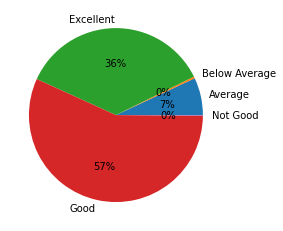

In [50]:
# % of cources by feedback category
plt.pie(feedbacks['course_title'],labels=feedbacks['Feedback_Category'], autopct='%.0f%%')
plt.show()

#### FeedBack by course_difficulty

In [51]:
# % of titles by course_difficulty
course_diff = courses.groupby('course_difficulty').agg({'course_title':'count'}).reset_index()
course_diff['percent']=(course_diff['course_title']/891)*100
course_diff

,course_difficulty,course_title,percent
0,ADVANCED,19,2.132435
1,BEGINNER,487,54.657688
2,INTERMEDIATE,198,22.222222
3,MIXED,187,20.987654


In [52]:
# % of titles by Course_difficulty and Feedback_Category
TitleCountby_diff_feedback = courses.groupby(['course_difficulty','Feedback_Category']).agg({'course_title':'count'}).reset_index()
TitleCountby_diff = courses.groupby(['course_difficulty']).agg({'course_title':'count'}).reset_index()
feedbackPercent = pd.merge(TitleCountby_diff_feedback,TitleCountby_diff,on='course_difficulty')
feedbackPercent['percent']=(feedbackPercent['course_title_x'] / feedbackPercent['course_title_y'])*100

In [53]:
feedbackPercent

,course_difficulty,Feedback_Category,course_title_x,course_title_y,percent
0,ADVANCED,Average,4,19,21.052632
1,ADVANCED,Excellent,5,19,26.315789
2,ADVANCED,Good,10,19,52.631579
3,BEGINNER,Average,31,487,6.365503
4,BEGINNER,Excellent,163,487,33.470226
5,BEGINNER,Good,293,487,60.164271
6,INTERMEDIATE,Average,19,198,9.595960
7,INTERMEDIATE,Below Average,3,198,1.515152
8,INTERMEDIATE,Excellent,59,198,29.797980
9,INTERMEDIATE,Good,117,198,59.090909


In both, Beginner and Intermrdiate difficulty level titles, 60% titles has Good feedback.<br>
In Mixed diificulty level has more percent of Excellent(50%) courses than Good(45%).

In [54]:
# pivot table for creating visualization for number of courses
pivot_percent = feedbackPercent.pivot_table(values='percent',aggfunc='sum',index='course_difficulty',columns='Feedback_Category').reset_index()
pivot_count = feedbackPercent.pivot_table(values='course_title_x',aggfunc='sum',index='course_difficulty',columns='Feedback_Category').reset_index()

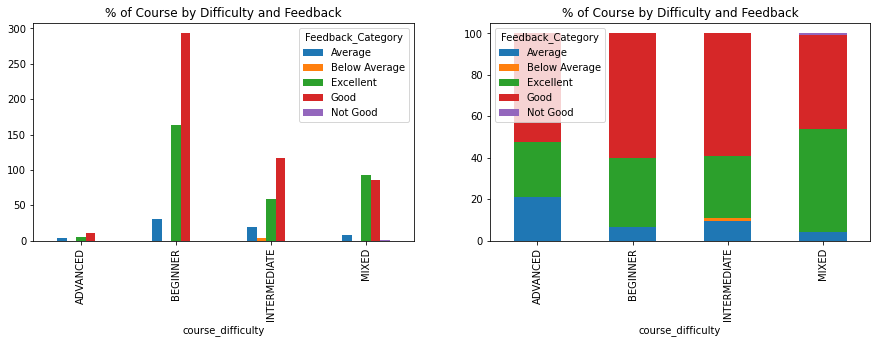

In [55]:
# bar chart to display number of titles and 
fig, ax = plt.subplots(1, 2, figsize=(15,4))
pivot_count.set_index('course_difficulty').plot(kind='bar',ax=ax[0],title='Number of Course by Difficulty and Feedback')
#sns.barplot(data=feedbackPercent,x='course_difficulty',y='course_title_x',hue='Feedback_Category',ax=ax[0])
#sns.barplot(data=feedbackPercent,x='course_difficulty',y='percent',hue='Feedback_Category',ax=ax[1])
pivot_percent.set_index('course_difficulty').plot(kind='bar',stacked=True,ax=ax[1],title='% of Course by Difficulty and Feedback')
plt.show()

#### FeedBack by course_Certificate_type

In [56]:
# number of course_Certificate_type in data
courses['course_Certificate_type'].value_counts()

COURSE                     582
SPECIALIZATION             297
PROFESSIOAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [57]:
## overview of course_Certificate_type column
print('-------course_Certificate_type-------')
print('% of Courses:', (582/891)*100)
print('% of SPECIALIZATION:', (297/891)*100)
print('% of PROFESSIOAL CERTIFICATE :', (12/891)*100)

-------course_Certificate_type-------
% of Courses: 65.31986531986533
% of SPECIALIZATION: 33.33333333333333
% of PROFESSIOAL CERTIFICATE : 1.3468013468013467


Out of total Certificate 65% are Courses, 33% are Specialization and 1% are PROFESSIOAL CERTIFICATE.

In [58]:
# calculated number of courses by course_Certificate_type and Feedback_Category
TitleCountby_Cert_feedback = courses.groupby(['course_Certificate_type','Feedback_Category']).agg({'course_title':'count'}).reset_index()
TitleCountby_Cert = courses.groupby(['course_Certificate_type']).agg({'course_title':'count'}).reset_index()
feedbackPercent_cert = pd.merge(TitleCountby_Cert_feedback,TitleCountby_Cert,on='course_Certificate_type')
feedbackPercent_cert['percent']=(feedbackPercent_cert['course_title_x'] / feedbackPercent_cert['course_title_y'])*100

In Certificate type, 45% titles of "COURSE" have Excellent feedback while "SPECIALIZATION" have 68% of titles with Excellent Feedback.

In [59]:
feedbackPercent_cert

,course_Certificate_type,Feedback_Category,course_title_x,course_title_y,percent
0,COURSE,Average,26,582,4.467354
1,COURSE,Excellent,260,582,44.673540
2,COURSE,Good,295,582,50.687285
3,COURSE,Not Good,1,582,0.171821
4,PROFESSIOAL CERTIFICATE,Excellent,3,12,25.000000
5,PROFESSIOAL CERTIFICATE,Good,9,12,75.000000
6,SPECIALIZATION,Average,36,297,12.121212
7,SPECIALIZATION,Below Average,3,297,1.010101
8,SPECIALIZATION,Excellent,57,297,19.191919
9,SPECIALIZATION,Good,201,297,67.676768


In [60]:
# calculated number of courses by course_Certificate_type,course_difficulty and Feedback_Category
Feedbackby_Cert_diff = courses.groupby(['course_Certificate_type','course_difficulty','Feedback_Category']).agg({'course_title':'count'}).reset_index()
Feedbackby_Cert_diff

,course_Certificate_type,course_difficulty,Feedback_Category,course_title
0,COURSE,ADVANCED,Excellent,3
1,COURSE,ADVANCED,Good,6
2,COURSE,BEGINNER,Average,10
3,COURSE,BEGINNER,Excellent,123
4,COURSE,BEGINNER,Good,149
5,COURSE,INTERMEDIATE,Average,8
6,COURSE,INTERMEDIATE,Excellent,41
7,COURSE,INTERMEDIATE,Good,55
8,COURSE,MIXED,Average,8
9,COURSE,MIXED,Excellent,93


##### Analysis by Organization

In [129]:
# number of course titles and Enrolled students in data
ByOrganization = courses.groupby(['course_organization']).agg({'course_title':'count','Enrolled(In K)':'sum'}).reset_index().sort_values(by='course_title',ascending=False)
# add average student per course in a organization
ByOrganization['Avg_Student_per_Course']=ByOrganization['Enrolled(In K)']/ByOrganization['course_title']

In [63]:
ByOrganization.head(5)

,course_organization,course_title,Enrolled(In K),Avg_Student_per_Course
137,UNIVERSITY OF PENNSYLVANIA,59,5501.3,93.242373
134,UNIVERSITY OF MICHIGAN,41,7437.7,181.407317
35,GOOGLE CLOUD,34,2604.3,76.597059
21,DUKE UNIVERSITY,28,3967.6,141.700000
49,JOHNS HOPKINS UNIVERSITY,28,4298.9,153.532143


In [64]:
courses.groupby(['course_organization']).agg({'Enrolled(In K)':'sum'}).reset_index().sort_values(by='Enrolled(In K)',ascending=False).head(10)

,course_organization,Enrolled(In K)
134,UNIVERSITY OF MICHIGAN,7437.7
137,UNIVERSITY OF PENNSYLVANIA,5501.3
86,STANFORD UNIVERSITY,4854.0
122,"UNIVERSITY OF CALIFORNIA, IRVINE",4326.0
49,JOHNS HOPKINS UNIVERSITY,4298.9
21,DUKE UNIVERSITY,3967.6
149,YALE UNIVERSITY,3952.0
39,IBM,2956.4
20,DEEPLEARNING.AI,2863.4
35,GOOGLE CLOUD,2604.3


In [65]:
# Organizations having more than 10 courses
morethan10courses=ByOrganization[ByOrganization['course_title']>10]

In [66]:
# corerelation of course_rating and Enrolled(In K)
courses[['course_rating','Enrolled(In K)']].corr()

,course_rating,Enrolled(In K)
course_rating,1.000000,0.072742
Enrolled(In K),0.072742,1.000000


'UNIVERSITY OF COLORADO SYSTEM has less student instead it has more courses and the reason is it has more number of specialization.

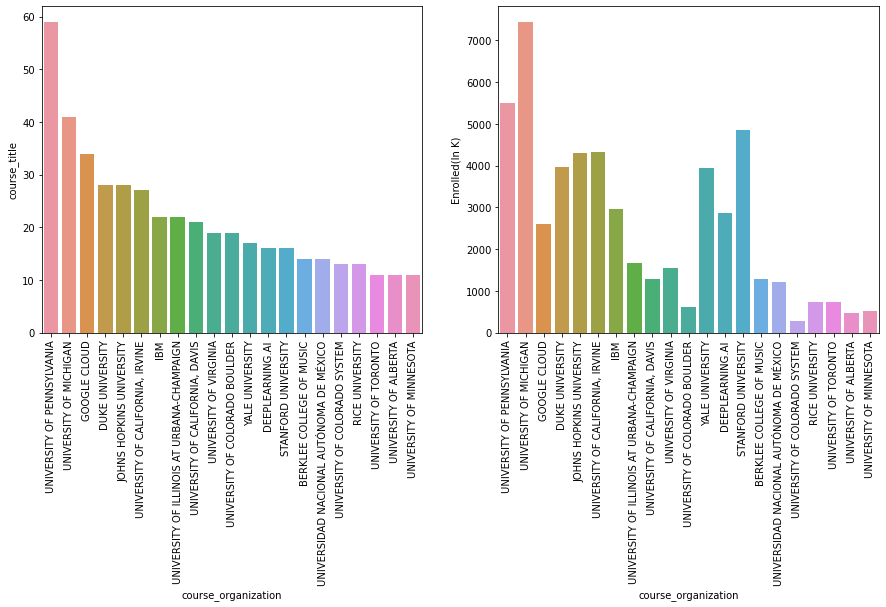

In [67]:
# visuals to check the performance of Organization which offers more than 10 courses
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(data = morethan10courses,x='course_organization',y='course_title',ax=ax[0])
sns.barplot(data = morethan10courses,x='course_organization',y='Enrolled(In K)',ax=ax[1])
ax[0].set_xticklabels(labels =morethan10courses['course_organization'], rotation=90)
ax[1].set_xticklabels(labels =morethan10courses['course_organization'], rotation=90)
plt.show()


There are total 154 Orgs, out of which 21 Orgs provide more than 10 courses.<br>
And 0ut of total enrolled student, 65% of students belong to those 21 Orgs. <br>
Which means increasing the number of courses in a organization attractsa more student. <br>

In [68]:
print('Total Unique Organization:',courses['course_organization'].unique().shape[0])
print('Total Number of Courses:',ByOrganization['course_title'].sum())
print('Total Enrolled Students:',courses['Enrolled(In K)'].sum())
print('------------------------------------------------')
print('Number of Organizations which provide more than 10 courses:',morethan10courses.shape[0])
print('Number of courses in  Organizations which provide more than 10 courses:',morethan10courses['course_title'].sum())
print('Enrolled in Organizations which provide more than 10 courses:',morethan10courses['Enrolled(In K)'].sum())
print('------------------------------------------------')
print('% of couses in Organization which provide more than 10 courses:',
      (morethan10courses['course_title'].sum()/ByOrganization['course_title'].sum())*100)
print('% of students in Organization which provide more than 10 courses:',
      (morethan10courses['Enrolled(In K)'].sum()/courses['Enrolled(In K)'].sum())*100)

Total Unique Organization: 154
Total Number of Courses: 891
Total Enrolled Students: 80681.9
------------------------------------------------
Number of Organizations which provide more than 10 courses: 21
Number of courses in  Organizations which provide more than 10 courses: 456
Enrolled in Organizations which provide more than 10 courses: 53140.1
------------------------------------------------
% of couses in Organization which provide more than 10 courses: 51.178451178451176
% of students in Organization which provide more than 10 courses: 65.86371912411582


STANFORD UNIVERSITY(16 titles) has the highest(303.3K) Avg Student per course among all Organization follwed by YALE UNIVERSITY(17 titles) with 232.4K.

In [69]:
ByOrganization.sort_values(by='Avg_Student_per_Course',ascending=False).head(10)

,course_organization,course_title,Enrolled(In K),Avg_Student_per_Course
86,STANFORD UNIVERSITY,16,4854.0,303.375000
149,YALE UNIVERSITY,17,3952.0,232.470588
59,MCMASTER UNIVERSITY,1,230.0,230.000000
34,GOOGLE - SPECTRUM SHARING,1,210.0,210.000000
53,LUDWIG-MAXIMILIANS-UNIVERSITÄT MÜNCHEN (LMU),2,385.0,192.500000
152,ÉCOLE POLYTECHNIQUE,1,190.0,190.000000
134,UNIVERSITY OF MICHIGAN,41,7437.7,181.407317
31,GEORGIA INSTITUTE OF TECHNOLOGY,10,1813.0,181.300000
20,DEEPLEARNING.AI,16,2863.4,178.962500
141,UNIVERSITY OF WASHINGTON,5,837.0,167.400000


In [70]:
# number of titles by org and certificate
titlescountby_org_cert=courses.groupby(['course_organization','course_Certificate_type']).agg({'course_title':'count','Enrolled(In K)':'sum'}).reset_index()
# convert certificate from rows to column
certificatedata=titlescountby_org_cert.pivot_table(values='course_title',aggfunc='sum',columns='course_Certificate_type',index='course_organization').reset_index()
#merge in one dataset to look easy for analysis
mergeddata = pd.merge(ByOrganization,certificatedata,on='course_organization')

# Add percentage of each certificate in each org
mergeddata['COURSE %'] = (mergeddata['COURSE']/mergeddata['course_title'])*100
mergeddata['PROFESSIOAL CERTIFICATE %'] = (mergeddata['PROFESSIOAL CERTIFICATE']/mergeddata['course_title'])*100
mergeddata['SPECIALIZATION %'] = (mergeddata['SPECIALIZATION']/mergeddata['course_title'])*100

In [71]:
mergeddata.head()

,course_organization,course_title,Enrolled(In K),Avg_Student_per_Course,COURSE,PROFESSIOAL CERTIFICATE,SPECIALIZATION,COURSE %,PROFESSIOAL CERTIFICATE %,SPECIALIZATION %
0,UNIVERSITY OF PENNSYLVANIA,59,5501.3,93.242373,44.0,NaN,15.0,74.576271,NaN,25.423729
1,UNIVERSITY OF MICHIGAN,41,7437.7,181.407317,30.0,NaN,11.0,73.170732,NaN,26.829268
2,GOOGLE CLOUD,34,2604.3,76.597059,17.0,2.0,15.0,50.000000,5.882353,44.117647
3,DUKE UNIVERSITY,28,3967.6,141.700000,22.0,NaN,6.0,78.571429,NaN,21.428571
4,JOHNS HOPKINS UNIVERSITY,28,4298.9,153.532143,17.0,NaN,11.0,60.714286,NaN,39.285714


In [72]:
mergeddata.sort_values(by='SPECIALIZATION',ascending=False).head(20)

,course_organization,course_title,Enrolled(In K),Avg_Student_per_Course,COURSE,PROFESSIOAL CERTIFICATE,SPECIALIZATION,COURSE %,PROFESSIOAL CERTIFICATE %,SPECIALIZATION %
0,UNIVERSITY OF PENNSYLVANIA,59,5501.3,93.242373,44.0,NaN,15.0,74.576271,NaN,25.423729
2,GOOGLE CLOUD,34,2604.3,76.597059,17.0,2.0,15.0,50.000000,5.882353,44.117647
5,"UNIVERSITY OF CALIFORNIA, IRVINE",27,4326.0,160.222222,12.0,1.0,14.0,44.444444,3.703704,51.851852
7,UNIVERSITY OF ILLINOIS AT URBANA-CHAMPAIGN,22,1679.0,76.318182,10.0,NaN,12.0,45.454545,NaN,54.545455
1,UNIVERSITY OF MICHIGAN,41,7437.7,181.407317,30.0,NaN,11.0,73.170732,NaN,26.829268
16,UNIVERSITY OF COLORADO SYSTEM,13,284.6,21.892308,2.0,NaN,11.0,15.384615,NaN,84.615385
4,JOHNS HOPKINS UNIVERSITY,28,4298.9,153.532143,17.0,NaN,11.0,60.714286,NaN,39.285714
8,"UNIVERSITY OF CALIFORNIA, DAVIS",21,1278.7,60.890476,11.0,NaN,10.0,52.380952,NaN,47.619048
10,UNIVERSITY OF COLORADO BOULDER,19,614.9,32.363158,9.0,NaN,10.0,47.368421,NaN,52.631579
17,RICE UNIVERSITY,13,736.0,56.615385,5.0,NaN,8.0,38.461538,NaN,61.538462


In [73]:
courses[courses['course_organization']=='UNIVERSITY OF COLORADO BOULDER']

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
26,27,ADVANCED BUSINESS ANALYTICS,UNIVERSITY OF COLORADO BOULDER,SPECIALIZATION,4.5,INTERMEDIATE,78K,78.0,Good
93,94,BLENDED LANGUAGE LEARNING: DESIGN AND PRACTICE...,UNIVERSITY OF COLORADO BOULDER,COURSE,4.8,INTERMEDIATE,1.9K,1.9,Excellent
120,121,BUSINESS WRITING,UNIVERSITY OF COLORADO BOULDER,COURSE,4.7,BEGINNER,48K,48.0,Good
147,148,COMPASSIONATE LEADERSHIP THROUGH SERVICE LEARN...,UNIVERSITY OF COLORADO BOULDER,COURSE,4.9,BEGINNER,6.4K,6.4,Excellent
223,224,DEVELOPING INDUSTRIAL INTERNET OF THINGS,UNIVERSITY OF COLORADO BOULDER,SPECIALIZATION,4.6,INTERMEDIATE,8K,8.0,Good
227,228,DIGITAL ADVERTISING STRATEGY,UNIVERSITY OF COLORADO BOULDER,SPECIALIZATION,4.4,BEGINNER,9K,9.0,Average
289,290,"EVERYDAY EXCEL, PART 1",UNIVERSITY OF COLORADO BOULDER,COURSE,4.8,BEGINNER,11K,11.0,Excellent
297,298,EXCEL/VBA FOR CREATIVE PROBLEM SOLVING,UNIVERSITY OF COLORADO BOULDER,SPECIALIZATION,4.8,BEGINNER,56K,56.0,Excellent
298,299,"EXCEL/VBA FOR CREATIVE PROBLEM SOLVING, PART 1",UNIVERSITY OF COLORADO BOULDER,COURSE,4.8,BEGINNER,54K,54.0,Excellent
394,395,GRAPHIC DESIGN ELEMENTS FOR NON-DESIGNERS,UNIVERSITY OF COLORADO BOULDER,SPECIALIZATION,4.7,BEGINNER,10K,10.0,Good


In [74]:
courses[courses['course_organization']=='UNIVERSITY OF COLORADO SYSTEM']

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
39,40,ALGORITHMS FOR BATTERY MANAGEMENT SYSTEMS,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.8,INTERMEDIATE,14K,14.0,Excellent
84,85,BECOME A SUSTAINABLE BUSINESS CHANGE AGENT,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.7,INTERMEDIATE,4.2K,4.2,Good
123,124,C# PROGRAMMING FOR UNITY GAME DEVELOPMENT,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.7,BEGINNER,36K,36.0,Good
152,153,COMPUTER SECURITY AND SYSTEMS MANAGEMENT,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.6,BEGINNER,27K,27.0,Good
183,184,CYBERSECURITY FOR BUSINESS,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.6,BEGINNER,23K,23.0,Good
205,206,DATA WAREHOUSING FOR BUSINESS INTELLIGENCE,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.5,ADVANCED,140K,140.0,Good
244,245,EMT FOUNDATIONS,UNIVERSITY OF COLORADO SYSTEM,COURSE,4.8,BEGINNER,7.1K,7.1,Excellent
410,411,HOMELAND SECURITY AND CYBERSECURITY,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.7,BEGINNER,5.5K,5.5,Good
629,630,NEWBORN BABY CARE,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.8,BEGINNER,5.3K,5.3,Excellent
643,644,PALLIATIVE CARE: IT'S NOT JUST HOSPICE ANYMORE,UNIVERSITY OF COLORADO SYSTEM,SPECIALIZATION,4.8,BEGINNER,3.2K,3.2,Excellent


In [75]:
courses[courses['course_organization']=='WESLEYAN UNIVERSITY']

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
173,174,CREATIVE WRITING,WESLEYAN UNIVERSITY,SPECIALIZATION,4.6,BEGINNER,140K,140.0,Good
174,175,CREATIVE WRITING: THE CRAFT OF PLOT,WESLEYAN UNIVERSITY,COURSE,4.7,MIXED,120K,120.0,Good
186,187,DATA ANALYSIS AND INTERPRETATION,WESLEYAN UNIVERSITY,SPECIALIZATION,4.4,BEGINNER,100K,100.0,Average
601,602,MEMOIR AND PERSONAL ESSAY: WRITE ABOUT YOURSELF,WESLEYAN UNIVERSITY,SPECIALIZATION,4.3,BEGINNER,13K,13.0,Average
735,736,SOCIAL PSYCHOLOGY,WESLEYAN UNIVERSITY,COURSE,4.7,BEGINNER,220K,220.0,Good


##### Analyze Enrolled students

<AxesSubplot:xlabel='Enrolled(In K)', ylabel='Count'>

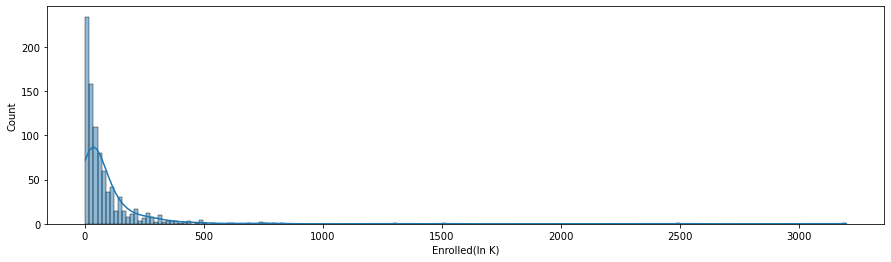

In [76]:
#Right Skewed
plt.figure(figsize=(15,4))
sns.histplot(courses['Enrolled(In K)'],kde=True)

##### Check Outlier
Will use box plot to check if there are any outliers in data.<br>
To get lower and upper bound for deciding outliers will use IQR.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Enrolled(In K)'>

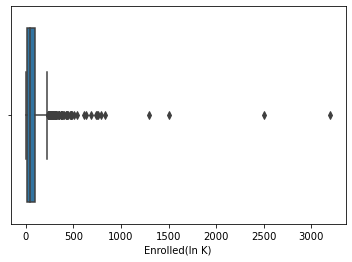

In [77]:
sns.boxplot((courses['Enrolled(In K)']))

In [78]:
(courses['Enrolled(In K)']).describe()

count     891.000000
mean       90.552076
std       181.936454
min         1.500000
25%        17.500000
50%        42.000000
75%        99.500000
max      3200.000000
Name: Enrolled(In K), dtype: float64

In [79]:
# IQR to find outliers
Q1 = np.percentile(courses['Enrolled(In K)'], 25)
Q3 = np.percentile(courses['Enrolled(In K)'], 75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print(Q1,Q3,IQR,lower,upper)

17.5 99.5 82.0 -105.5 222.5


In [80]:
outliers=courses[courses['Enrolled(In K)']>upper]

In [81]:
outliers['Feedback_Category'].value_counts()

Good         44
Excellent    31
Average       3
Name: Feedback_Category, dtype: int64

Results:
For Enrolled student there are 78 record as ouliers. Course having students greater than 222.5K are ouliers in our data. Out of 78 titles, 44 has Good feedback while 31 has Excellent feedback.

<AxesSubplot:xlabel='Enrolled(In K)', ylabel='Count'>

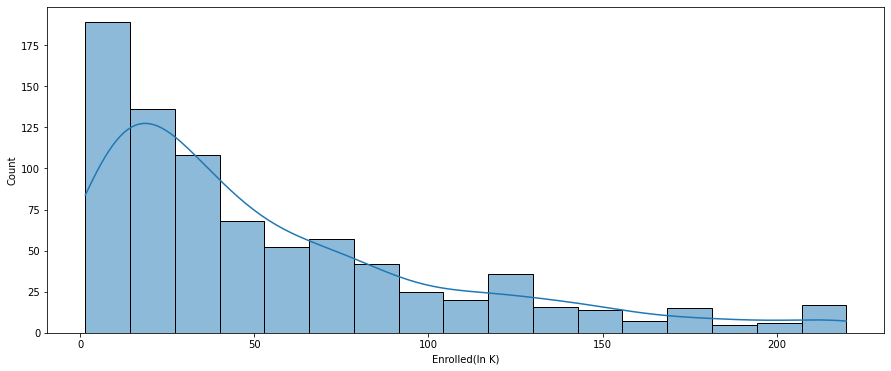

In [82]:
#Distribution after removing outliers
plt.figure(figsize=(15,6))
sns.histplot((courses[courses['Enrolled(In K)']<upper]['Enrolled(In K)']),kde=True)

In [83]:
studentby_diff=courses.groupby(['course_difficulty']).agg({'Enrolled(In K)':'sum'}).reset_index()
studentby_diff

,course_difficulty,Enrolled(In K)
0,ADVANCED,1264.4
1,BEGINNER,39921.8
2,INTERMEDIATE,14506.3
3,MIXED,24989.4


In [84]:
courses['Enrolled(In K)'].sum()

80681.9

In [85]:
studentby_diff['percent']=(studentby_diff['Enrolled(In K)']/courses['Enrolled(In K)'].sum())*100

In [86]:
studentby_diff

,course_difficulty,Enrolled(In K),percent
0,ADVANCED,1264.4,1.567142
1,BEGINNER,39921.8,49.480491
2,INTERMEDIATE,14506.3,17.979621
3,MIXED,24989.4,30.972746


There are total 80681.9K student who enrolled for courses out of which 50% are for Begginer courses follwed by Mixed(30%), Intermediate(17%) and Advanced(2%).

In [87]:
courses.sort_values(by='Enrolled(In K)',ascending=False).head(10)

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
564,565,MACHINE LEARNING,STANFORD UNIVERSITY,COURSE,4.9,MIXED,3.2M,3200.0,Excellent
815,816,THE SCIENCE OF WELL-BEING,YALE UNIVERSITY,COURSE,4.9,MIXED,2.5M,2500.0,Excellent
688,689,PYTHON FOR EVERYBODY,UNIVERSITY OF MICHIGAN,SPECIALIZATION,4.8,BEGINNER,1.5M,1500.0,Excellent
674,675,PROGRAMMING FOR EVERYBODY (GETTING STARTED WIT...,UNIVERSITY OF MICHIGAN,COURSE,4.8,MIXED,1.3M,1300.0,Excellent
196,197,DATA SCIENCE,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,4.5,BEGINNER,830K,830.0,Good
129,130,CAREER SUCCESS,"UNIVERSITY OF CALIFORNIA, IRVINE",SPECIALIZATION,4.4,BEGINNER,790K,790.0,Average
261,262,ENGLISH FOR CAREER DEVELOPMENT,UNIVERSITY OF PENNSYLVANIA,COURSE,4.8,MIXED,760K,760.0,Excellent
765,766,SUCCESSFUL NEGOTIATION: ESSENTIAL STRATEGIES A...,UNIVERSITY OF MICHIGAN,COURSE,4.8,MIXED,750K,750.0,Excellent
199,200,DATA SCIENCE: FOUNDATIONS USING R,JOHNS HOPKINS UNIVERSITY,SPECIALIZATION,4.6,BEGINNER,740K,740.0,Good
211,212,DEEP LEARNING,DEEPLEARNING.AI,SPECIALIZATION,4.8,INTERMEDIATE,690K,690.0,Excellent


In [97]:
courses[['course_rating','Enrolled(In K)']].corr()

,course_rating,Enrolled(In K)
course_rating,1.000000,0.072742
Enrolled(In K),0.072742,1.000000


In [98]:
temp = courses[(courses['course_title'].str.contains('PYTHON')) & (courses['course_difficulty']=='BEGINNER') & (courses['course_Certificate_type']=='COURSE')]
temp

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81K,81.0,Excellent
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110K,110.0,Good
466,467,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,COURSE,4.4,BEGINNER,100K,100.0,Average
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120K,120.0,Excellent
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110K,110.0,Excellent
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26K,26.0,Excellent
687,688,PYTHON FOR DATA SCIENCE AND AI,IBM,COURSE,4.6,BEGINNER,170K,170.0,Good
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30K,30.0,Good
851,852,USING PYTHON TO INTERACT WITH THE OPERATING SY...,GOOGLE,COURSE,4.7,BEGINNER,19K,19.0,Good
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67K,67.0,Excellent


In [102]:
temp['a']=temp['course_rating']/temp['course_rating'].max()
temp['b']=temp['Enrolled(In K)']/temp['Enrolled(In K)'].max()

C:\Users\sande\AppData\Local\Temp/ipykernel_8568/1583055558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['a']=temp['course_rating']/temp['course_rating'].max()
C:\Users\sande\AppData\Local\Temp/ipykernel_8568/1583055558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['b']=temp['Enrolled(In K)']/temp['Enrolled(In K)'].max()


In [112]:
temp['c'] = 0.75 * temp['a']+ 0.25 * temp['b']

C:\Users\sande\AppData\Local\Temp/ipykernel_8568/2969252016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['c'] = 0.75 * temp['a']+ 0.25 * temp['b']


In [113]:
temp

,S.No,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Enrolled(In K),Feedback_Category,a,b,c
171,172,CRASH COURSE ON PYTHON,GOOGLE,COURSE,4.8,BEGINNER,81K,81.0,Excellent,0.979592,0.476471,0.853812
188,189,DATA ANALYSIS WITH PYTHON,IBM,COURSE,4.7,BEGINNER,110K,110.0,Good,0.959184,0.647059,0.881152
466,467,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,COURSE,4.4,BEGINNER,100K,100.0,Average,0.897959,0.588235,0.820528
530,531,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,COURSE,4.9,BEGINNER,120K,120.0,Excellent,1.000000,0.705882,0.926471
682,683,PYTHON BASICS,UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,110K,110.0,Excellent,0.979592,0.647059,0.896459
685,686,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,COURSE,4.8,BEGINNER,26K,26.0,Excellent,0.979592,0.152941,0.772929
687,688,PYTHON FOR DATA SCIENCE AND AI,IBM,COURSE,4.6,BEGINNER,170K,170.0,Good,0.938776,1.000000,0.954082
841,842,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,COURSE,4.7,BEGINNER,30K,30.0,Good,0.959184,0.176471,0.763505
851,852,USING PYTHON TO INTERACT WITH THE OPERATING SY...,GOOGLE,COURSE,4.7,BEGINNER,19K,19.0,Good,0.959184,0.111765,0.747329
880,881,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,COURSE,4.8,BEGINNER,67K,67.0,Excellent,0.979592,0.394118,0.833223


In [119]:
temp.sort_values(by='c',ascending=False)[['course_title','course_organization','course_rating','course_difficulty','Enrolled(In K)','Feedback_Category','a','b','c']]

,course_title,course_organization,course_rating,course_difficulty,Enrolled(In K),Feedback_Category,a,b,c
687,PYTHON FOR DATA SCIENCE AND AI,IBM,4.6,BEGINNER,170.0,Good,0.938776,1.000000,0.954082
530,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO COM PYTHON ...,UNIVERSIDADE DE SÃO PAULO,4.9,BEGINNER,120.0,Excellent,1.000000,0.705882,0.926471
682,PYTHON BASICS,UNIVERSITY OF MICHIGAN,4.8,BEGINNER,110.0,Excellent,0.979592,0.647059,0.896459
188,DATA ANALYSIS WITH PYTHON,IBM,4.7,BEGINNER,110.0,Good,0.959184,0.647059,0.881152
171,CRASH COURSE ON PYTHON,GOOGLE,4.8,BEGINNER,81.0,Excellent,0.979592,0.476471,0.853812
880,МАТЕМАТИКА И PYTHON ДЛЯ АНАЛИЗА ДАННЫХ,E-LEARNING DEVELOPMENT FUND,4.8,BEGINNER,67.0,Excellent,0.979592,0.394118,0.833223
883,ОСНОВЫ ПРОГРАММИРОВАНИЯ НА PYTHON,NATIONAL RESEARCH UNIVERSITY HIGHER SCHOOL OF ...,4.6,BEGINNER,83.0,Good,0.938776,0.488235,0.826140
466,INTRODUCCIÓN A LA PROGRAMACIÓN EN PYTHON I: AP...,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,4.4,BEGINNER,100.0,Average,0.897959,0.588235,0.820528
685,"PYTHON FUNCTIONS, FILES, AND DICTIONARIES",UNIVERSITY OF MICHIGAN,4.8,BEGINNER,26.0,Excellent,0.979592,0.152941,0.772929
841,UNDERSTANDING AND VISUALIZING DATA WITH PYTHON,UNIVERSITY OF MICHIGAN,4.7,BEGINNER,30.0,Good,0.959184,0.176471,0.763505
